In [1]:
import streamlit as st
import requests, json
import pandas as pd 
from web3 import Web3
import time 
import numpy as np
import pymongo
from pymongo import MongoClient
from helpers import parse_meebit_data

import re
from bs4 import BeautifulSoup
import datetime
import time
import os
import sys
import matplotlib.pyplot as plt



In [3]:
df_allapi  = pd.read_csv('./osfstorage-archive/Data_API.csv')  
df_allapi_opensea = df_allapi.loc[df_allapi['Market'] == "OpenSea"] 
df_allapi_opensea_cryptokitties = df_allapi_opensea.loc[df_allapi['Collection'] == "Cryptokitties"] 

df_allapi_opensea_cryptokitties['Datetime_updated'] = pd.to_datetime(df_allapi_opensea_cryptokitties['Datetime_updated'])
df_allapi_opensea_cryptokitties = df_allapi_opensea_cryptokitties.sort_values(by='Datetime_updated', ascending=False)

print(len(df_allapi_opensea_cryptokitties))

df_allapi_opensea_cryptokitties.head()

/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_75292/1131036959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allapi_opensea_cryptokitties['Datetime_updated'] = pd.to_datetime(df_allapi_opensea_cryptokitties['Datetime_updated'])


366777


,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
5945494,0x06012c8cf97bead5deae237070f9587f8e7a266d,1629269,0x6eadb104546c62a22824e93f128ca3149daec989890f...,0xf54d5f44029156ce17878d2b407ff2469417862c,Cryptonauts_Fund,0x4e60ce458c6ea876a12af604aa8baf3b49dd206c,NaN,https://lh3.googleusercontent.com/ywqXL3zEo3Fm...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/ywqXL3zEo3Fm...,...,Sir Sourtock,Yikes! You scared me. I'm Sir Sourtock. I feel...,Cryptokitties,OpenSea,2021-04-27,2021-04-27 02:12:03,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '1629269')",Cryptokittie,Art
5944444,0x06012c8cf97bead5deae237070f9587f8e7a266d,1859170,0x7c0644969f9cae453d3635746676cadd06fe2e3c1d04...,0x0acb5378a717c5b040f326720bb09e573905c2d3,0x4fabda_Alt_2,0x351370224d532623f242335d0581da3a3c56a786,NaN,https://lh3.googleusercontent.com/yL7ztfVRdVwn...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/yL7ztfVRdVwn...,...,🧬 Gen 1 H1 Gene Swap,"Hey, what's up, hello. My parents named me 🧬 G...",Cryptokitties,OpenSea,2021-04-27,2021-04-27 08:46:01,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '1859170')",Cryptokittie,Art
5944835,0x06012c8cf97bead5deae237070f9587f8e7a266d,1278203,0xce20bea0849153c2e44252132a4e0013e47b8a8f0c60...,0xcc353334487696ebc3e15411e0b106186eba3c0c,alege,0xbbba5a35a8a17cee0a8a0499fe281059cc839ed7,bz-photodesign,https://lh3.googleusercontent.com/bGlwLh9V83oF...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/bGlwLh9V83oF...,...,Demon Hisseyes,Ooope. My parents named me Demon Hisseyes. I h...,Cryptokitties,OpenSea,2021-04-27,2021-04-27 06:21:49,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '1278203')",Cryptokittie,Art
5944836,0x06012c8cf97bead5deae237070f9587f8e7a266d,1319628,0x0ad1a747829b4051fa4ee5df8c88d04a6f98b07588d0...,0x3cd673f4b8e7815f4862222ef0786241f952aeae,0x3cd673f4b8e7815f4862222ef0786241f952aeae,0xbbba5a35a8a17cee0a8a0499fe281059cc839ed7,bz-photodesign,https://lh3.googleusercontent.com/Wj6e-TFqBoC6...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/Wj6e-TFqBoC6...,...,Nala Magicsocks,How do you do! Call me Nala Magicsocks. Don't ...,Cryptokitties,OpenSea,2021-04-27,2021-04-27 06:21:49,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '1319628')",Cryptokittie,Art
5945072,0x06012c8cf97bead5deae237070f9587f8e7a266d,1851695,0x60516c2f2e42b20ed4064f234542f2ee599098b8f03e...,0x0acb5378a717c5b040f326720bb09e573905c2d3,0x4fabda_Alt_2,0x5a667f33a24bdcb0dee1bacf61d828cdc51e496e,Potamus,https://lh3.googleusercontent.com/ngtCwoBbI6bm...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/ngtCwoBbI6bm...,...,Sensei Conmumu,Namaste. You may call me Sensei Conmumu. If I ...,Cryptokitties,OpenSea,2021-04-27,2021-04-27 04:39:45,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '1851695')",Cryptokittie,Art


In [1053]:


traits = defaultdict(lambda: defaultdict(dict))

asset_rarities=[]
with open('cryptokitties_assets_g0.json') as f:
    data_all = json.loads(f.read())
    df_crypto_all = pd.DataFrame(data_all['assets'])
    
    ### rarities
    for ind, asset in enumerate(data_all['assets']):
        asset_rarity = 1
        #print(asset['ID_token'])
        traits[ind]['ID_token'] = asset['ID_token']
        traits[ind]['Smart_contract'] = asset['Smart_contract']
        traits[ind]['num_sales'] = asset['num_sales']
        traits[ind]['total_price'] = asset['total_price']
        for trait in asset['traits']:
            traits[ind][trait['trait_type'] + '_value'] = trait['value']
            traits[ind][trait['trait_type'] + '_count'] = trait['trait_count']

df_traits = pd.DataFrame.from_dict(traits, orient='index')
df_traits = df_traits.drop_duplicates(subset='ID_token', keep="first")
df_crypto_all = df_crypto_all.drop_duplicates(subset='ID_token', keep="first")

len(df_crypto_all)

31766

In [10]:
#print(len(df_crypto_all))
#print(len(df_traits))
df_traits.head()
#df_crypto_all['created'].unique()

array(['2018-01-23T04:51:38.832339'], dtype=object)

### RARITY COUNTS PER TRAIT AND GENERATION


In [11]:
options = {'PU':1, 'Secret':2, 'Environment': 3, 'Mouth':4, 'Wild':5,
          'Accent_Colour':6, 'Highlight_Colour': 7, 'Base_Colour': 8, 'Eye_Shape': 9,
          'Eye_Colour':10, 'Pattern': 11, 'Fur':12}

alltraits = []

for key, value in options.items():
    url = "https://kittyhelper.co/tools/traits-rarity/?type=" + str(value)
    page = requests.get(url) #params={"search_api_views_fulltext": ""}
    soup = BeautifulSoup(page.text) 
    
    tr_elements = soup.find_all('table')[0].find_all('tr')
    for tr in tr_elements[1:-1]:
        #print(tr)
        td_elements = tr.find_all('td')

        thisone = [value]
        #trait
        xx = str(td_elements[1]).strip('<td>').strip('</')
        trait = re.findall(r"\>(.*?)\<",xx)
        thisone.append(trait[0].lower())
    
        #genvals = [] 
        for gen in range(2,7):
            xx = str(td_elements[gen]).strip('<td>').strip('</')
            thisone.append(xx)
        
        alltraits.extend([thisone]) 
        
df_cattributes = pd.DataFrame(alltraits, columns=['category', 'cattribute', 'gen0', 'gen1', 'gen2', 'gen3', 'gen4'])
df_cattributes

,category,cattribute,gen0,gen1,gen2,gen3,gen4
0,1,pu00,1,1481,1544,1554,1496
1,1,pu01,674,2546,1901,1523,1364
2,1,pu02,790,3202,2265,1846,1542
3,1,pu03,0,88,330,246,330
4,1,pu04,0,919,1455,1406,1609
...,...,...,...,...,...,...,...
367,12,toyger,0,0,84,552,344
368,12,manx,1,0,312,1015,827
369,12,lykoi,0,0,0,154,704
370,12,burmilla,0,0,0,107,707


## get generations 0-4

In [14]:

#features = df_traits.loc[df_traits['generation_value'].isin([0, 1, 2, 3, 4])]
df_traits.columns

Index(['ID_token', 'Smart_contract', 'num_sales', 'total_price',
       'eye_shape_value', 'eye_shape_count', 'highlight_colour_value',
       'highlight_colour_count', 'fur_value', 'fur_count',
       'accent_colour_value', 'accent_colour_count', 'cooldown_timer_value',
       'cooldown_timer_count', 'base_colour_value', 'base_colour_count',
       'eye_colour_value', 'eye_colour_count', 'virginity_value',
       'virginity_count', 'pattern_value', 'pattern_count', 'generation_value',
       'generation_count', 'mouth_value', 'mouth_count', 'secret_value',
       'secret_count', 'purrstige_value', 'purrstige_count', 'eyes_value',
       'eyes_count', 'body_value', 'body_count', 'colorprimary_value',
       'colorprimary_count', 'coloreyes_value', 'coloreyes_count',
       'colortertiary_value', 'colortertiary_count', 'colorsecondary_value',
       'colorsecondary_count', 'cooldown_index_value', 'cooldown_index_count',
       'fancy_type_value', 'fancy_type_count', 'fanciness_value',
 

#### calculate rarity

In [1085]:
rarities = defaultdict(lambda: defaultdict(dict))

calc_rarities=[]

for ind, row in df_traits.iterrows():

    strgen = "gen0"

    rarities[ind]['ID_token'] = row['ID_token']
    rarities[ind]['Smart_contract'] = row['Smart_contract']

    #PU_1
    x = df_cattributes[df_cattributes["cattribute"]==row['purrstige_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['purrstige_value']].index.values:   
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['PU_rarity']  = 0
        else:    
            rarities[ind]['PU_rarity']  = row['purrstige_count'] / int(df_cattributes[strgen][x])
    else: 
        rarities[ind]['PU_rarity']  = 0
     
    #secret_2
    x = df_cattributes[df_cattributes["cattribute"]==row['secret_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['secret_value']].index.values: 
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['secret_rarity']  = 0
        else:     
            rarities[ind]['secret_rarity']  = row['secret_count'] / int(df_cattributes[strgen][x])
    else: 
        rarities[ind]['secret_rarity']  = 0
        

        
    #mouth_4
    x = df_cattributes[df_cattributes["cattribute"]==row['mouth_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['mouth_value']].index.values: 
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['mouth_rarity']  = 0
        else:          
            rarities[ind]['mouth_rarity']  = row['mouth_count'] / int(df_cattributes[strgen][x])

    else: 
        rarities[ind]['mouth_rarity']  = 0
        

    #accent_color_6
    x = df_cattributes[df_cattributes["cattribute"]==row['accent_colour_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['accent_colour_value']].index.values:   
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['accent_colour_rarity']  = 0
        else:          
            rarities[ind]['accent_colour_rarity']  = row['accent_colour_count'] / int(df_cattributes[strgen][x])

    else: 
        rarities[ind]['accent_colour_rarity']  = 0
        
    #highlight_color_7
    x = df_cattributes[df_cattributes["cattribute"]==row['highlight_colour_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['highlight_colour_value']].index.values: 
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['highlight_colour_rarity']  = 0
        else:        
            rarities[ind]['highlight_colour_rarity']  = row['highlight_colour_count'] / int(df_cattributes[strgen][x])
    else: 
        rarities[ind]['highlight_colour_rarity']  = 0
        
    #base_color_8
    x = df_cattributes[df_cattributes["cattribute"]==row['base_colour_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['base_colour_value']].index.values:   
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['base_colour_rarity']  = 0
        else:        
            rarities[ind]['base_colour_rarity']  = row['base_colour_count'] / int(df_cattributes[strgen][x])
    else: 
        rarities[ind]['base_colour_rarity']  = 0
        
    #eye_shape_9
    x = df_cattributes[df_cattributes["cattribute"]==row['eye_shape_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['eye_shape_value']].index.values:  
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['eye_shape_rarity']  = 0
        else:
            rarities[ind]['eye_shape_rarity']  = row['eye_shape_count'] / int(df_cattributes[strgen][x])
    else: 
        rarities[ind]['eye_shape_rarity']  = 0
        
    #eye_color_10
    x = df_cattributes[df_cattributes["cattribute"]==row['eye_colour_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['eye_colour_value']].index.values:  
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['eye_colour_rarity']  = 0
        else:         
            rarities[ind]['eye_colour_rarity']  = row['eye_colour_count'] / int(df_cattributes[strgen][x])
    else: 
        rarities[ind]['eye_colour_rarity']  = 0
        
    #pattern_11
    x = df_cattributes[df_cattributes["cattribute"]==row['pattern_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['pattern_value']].index.values: 
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['pattern_rarity']  = 0
        else:
            rarities[ind]['pattern_rarity']  = row['pattern_count'] / int(df_cattributes[strgen][x])
    else: 
        rarities[ind]['pattern_rarity']  = 0
        
    #fur_12
    x = df_cattributes[df_cattributes["cattribute"]==row['fur_value']].index.values
    if df_cattributes[df_cattributes["cattribute"]==row['fur_value']].index.values:   
        if int(df_cattributes[strgen][x]) == 0:
            rarities[ind]['fur_rarity']  = 0
        else:          
            rarities[ind]['fur_rarity']  = row['fur_count'] / int(df_cattributes[strgen][x])
    else: 
        rarities[ind]['fur_rarity']  = 0
        
        
    masked_pu= rarities[ind]['PU_rarity']
    if rarities[ind]['PU_rarity'] == 0:
        masked_pu= 0
        
    masked_mouth = rarities[ind]['mouth_rarity']
    if rarities[ind]['mouth_rarity'] == 0:
        masked_mouth = 0
        
    masked_secret = rarities[ind]['secret_rarity']
    if rarities[ind]['secret_rarity'] == 0:
        masked_secret = 0
    #masked_env = rarities[ind]['env_rarity']
    #if rarities[ind]['env_rarity'] is None:
    #    masked_env = 1
    #masked_wild = rarities[ind]['wild_rarity']
    #if rarities[ind]['wild_rarity'] == 0:
    #    masked_wild = 1
    masked_accent_colour = rarities[ind]['accent_colour_rarity']
    if rarities[ind]['accent_colour_rarity'] == 0:
        masked_accent_colour = 0
        
    masked_highlight_colour = rarities[ind]['highlight_colour_rarity']
    if rarities[ind]['highlight_colour_rarity'] == 0:
        masked_highlight_colour = 0
        
    masked_base_colour = rarities[ind]['base_colour_rarity']
    if rarities[ind]['base_colour_rarity'] == 0:
        masked_base_colour = 0
        
    masked_eye_shape = rarities[ind]['eye_shape_rarity']
    if rarities[ind]['eye_shape_rarity'] == 0:
        masked_eye_shape = 0
        
    masked_eye_colour = rarities[ind]['eye_colour_rarity']
    if rarities[ind]['eye_colour_rarity'] == 0:
        masked_eye_colour = 0
        
    masked_pattern = rarities[ind]['pattern_rarity']
    if rarities[ind]['pattern_rarity'] == 0:
        masked_pattern = 0
        
    masked_fur = rarities[ind]['fur_rarity']
    if rarities[ind]['fur_rarity'] == 0:
        masked_fur = 0
        
    rarities[ind]['overall_rarity_mult'] = (1/1)*masked_pu * masked_secret  * masked_mouth * masked_accent_colour * masked_highlight_colour * masked_base_colour * masked_eye_shape * masked_eye_colour * masked_pattern * masked_fur
    rarities[ind]['overall_rarity_sum'] = 0 + masked_pu + masked_secret  + masked_mouth  + masked_accent_colour + masked_highlight_colour + masked_base_colour + masked_eye_shape + masked_eye_colour + masked_pattern + masked_fur


df_rarities = pd.DataFrame.from_dict(rarities, orient='index')
df_rarities = df_rarities.drop_duplicates(subset='ID_token', keep="first")

/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_62730/742553198.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_cattributes[df_cattributes["cattribute"]==row['purrstige_value']].index.values:
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_62730/742553198.py:24: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_cattributes[df_cattributes["cattribute"]==row['secret_value']].index.values:
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_62730/742553198.py:48: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if df_cattributes[

In [1123]:
df_merged_traitrare = pd.merge(df_traits, df_rarities, on=['ID_token', 'Smart_contract'], how='left')
df_merged_traitrare['total_price'] = df_merged_traitrare['total_price'].astype('float')
for ind, price in enumerate(df_merged_traitrare['total_price']):
    if df_merged_traitrare['total_price'][ind] >1:
        df_merged_traitrare['total_price'][ind] = float(price)/10**11
    else:
        df_merged_traitrare['total_price'][ind] = 0.0
        
df_merged_traitrare = df_merged_traitrare.loc[df_merged_traitrare['generation_value'] == 0]

df_merged_traitrare = df_merged_traitrare.sort_values(by='total_price', ascending=False)
df_merged_traitrare = df_merged_traitrare.reset_index(drop=True)
print(len(df_merged_traitrare))

indexNames = df_merged_traitrare[(df_merged_traitrare['total_price'] == 0.0)].index
df_merged_traitrare = df_merged_traitrare.drop(indexNames)


indexNames = df_merged_traitrare[(df_merged_traitrare['overall_rarity_sum'] < 100.0)].index
df_merged_traitrare = df_merged_traitrare.drop(indexNames)
df_merged_traitrare = df_merged_traitrare.dropna(subset=['overall_rarity_sum'])

indexNames = df_merged_traitrare[(df_merged_traitrare['total_price'] >= .2e9)].index
df_merged_traitrare = df_merged_traitrare.drop(indexNames)


indexNames1 = df_merged_traitrare[(df_merged_traitrare['overall_rarity_sum'] > 1000.0)].index
df_merged_traitrare = df_merged_traitrare.drop(indexNames1)



df_merged_traitrare =df_merged_traitrare.drop(df_merged_traitrare.tail(240).index)


df_merged_traitrare=df_merged_traitrare.replace(np.nan, '0')


print(len(df_merged_traitrare))


/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_62730/4207088558.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_traitrare['total_price'][ind] = 0.0
/var/folders/vh/k7krxtl53wz_vryc3nf_zvw40000gn/T/ipykernel_62730/4207088558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_traitrare['total_price'][ind] = float(price)/10**11


31729
29911


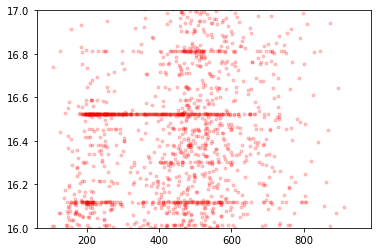

In [1156]:
plt.plot((df_merged_traitrare['overall_rarity_sum']), np.log1p((df_merged_traitrare['total_price'])),  '.r', alpha=.2)
#plt.xlim([0, 1000])
plt.ylim([16, 17])
plt.show()

#plt.plot((df_merged_traitrare['cooldown_timer_value']), np.log((df_merged_traitrare['total_price'])),  '.r', alpha=.2)
#plt.show()


###  MACHINE LEARNING

In [826]:
from collections import defaultdict 
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.metrics import fbeta_score, r2_score, make_scorer

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import r2_score
from sklearn.preprocessing import MaxAbsScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor

###REGRESSORS
from sklearn.linear_model import Ridge
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

In [1127]:

opts = ['ID_token', 'accent_colour_count', 
       'cooldown_timer_count', 'base_colour_count', 
        'pattern_count', 
       'secret_count', 
         'cooldown_index_count',
       'fancy_ranking_count', 
       'mouth_rarity', 'accent_colour_rarity','eye_shape_rarity',
        'fanciness_count', 'exclusivity_count', 'fur_rarity', 'colorsecondary_count','fancy_type_count',
'eye_colour_rarity', 'eye_colour_count', 'coloreyes_count','PU_rarity','body_count', 'eyes_count',  
'mouth_count', 'fur_count','pattern_rarity','eye_shape_count', 
'colortertiary_count','highlight_colour_rarity', 'base_colour_rarity','secret_rarity', 
'highlight_colour_count', 'colorprimary_count',  'purrstige_count']  #'overall_rarity_sum'


categorical = [ 'base_colour_value', 
       'eye_colour_value', 'virginity_value',
        'pattern_value', 'generation_value',
       'mouth_value', 'secret_value',
       'purrstige_value', 'eyes_value',
       'body_value',  'colorprimary_value',
       'coloreyes_value',
       'colortertiary_value',  'colorsecondary_value',
       'eye_shape_value', 'fur_value', 'accent_colour_value']   

#categorical = ['cooldown_timer_value']

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")



columnsused = opts + categorical
Xdata = df_merged_traitrare[df_merged_traitrare.columns[df_merged_traitrare.columns.isin(columnsused)]]
ydata = np.log1p(df_merged_traitrare['total_price'])

ctransformer  = ColumnTransformer([('categorical', OneHotEncoder(handle_unknown = 'ignore'), categorical ),
                                   ('numeric', 'passthrough', opts)])

                                   
#('categorical', OneHotEncoder(handle_unknown = 'ignore'), categorical ),
                                   

In [1173]:

Xdata,  ydata = shuffle(Xdata,  ydata, random_state=15)

poly = PolynomialFeatures(include_bias = False, interaction_only =True)
X_train, X_test, y_train, y_test = train_test_split( Xdata, ydata, test_size=0.33, random_state=0)


In [1198]:


#ridge
pipe = Pipeline([('categorical', ctransformer) , ('poly', poly), ('scaling', MaxAbsScaler()),
                 ('regressor', Ridge(alpha=.1, random_state = 2)) ]) #('gs_est', gs_est)])   ('pca', TruncatedSVD(n_components=180)), 

#lasso
pipe = Pipeline([('categorical', ctransformer) , ('poly', poly), ('scaling', MaxAbsScaler()),
                 ('regressor', Lasso(alpha=0.002)) ]) #('gs_est', gs_est)])   ('pca', TruncatedSVD(n_components=180)), 


#knn
#pipe = Pipeline([ ('categorical', ctransformer) , ('poly', poly),('scaling', MaxAbsScaler()),
#                 ('regressor', KNeighborsRegressor(n_neighbors=51, weights = 'distance', metric='manhattan'))]) #('gs_est', gs_est)]) 

#svm
#svm1 = svm.SVR()
#pipe = Pipeline([('categorical', ctransformer),  ('scaling', MaxAbsScaler()),
#                 ('regressor', svm1 )  ])

#rf
#pipe = Pipeline([('categorical', ctransformer),  ('scaling', MaxAbsScaler()),
#                 ('regressor', RandomForestRegressor(random_state = 42))]) #('gs_est', gs_est)]) 



#pipe.fit(Xdata , ydata)
#y_pred1 = pipe.predict(Xdata )
#R2score = r2_score(ydata, y_pred1, multioutput='variance_weighted')
#print(R2score)
#print(pipe.score(Xdata , ydata))


pipe.fit(X_train, y_train)
y_pred2 = pipe.predict(X_test)
R2score = r2_score(y_test, y_pred2, multioutput='variance_weighted')
print(R2score)
print(pipe.score(X_train, y_train))


#print(pipe.get_params())

#minkowski 0.5214804693843551  0.5206734173538454
#euclidean 0.5214804693843551  0.5206734173538454
#manhattan 0.5291851997485517  0.5276211065772105

0.5532188762557972
0.5461892948986611


/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


173


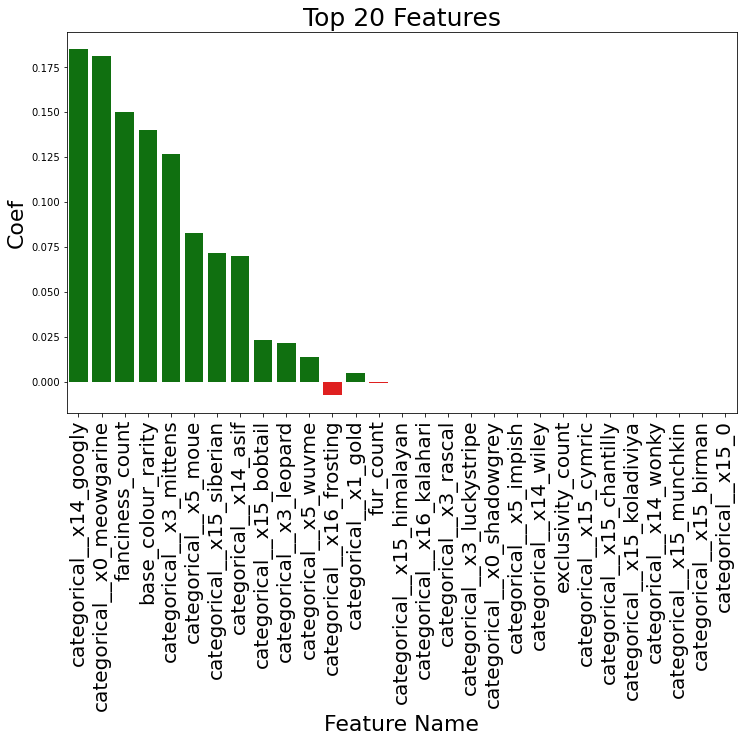

In [1199]:
coefs = pipe.named_steps["regressor"].coef_.flatten()
feature_names = pipe.named_steps["categorical"].get_feature_names()
zipped = zip(feature_names, coefs)
df= pd.DataFrame(zipped, columns=["feature", "value"])
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df[1:30],   #
           palette=df[1:30]["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

print(len(df))

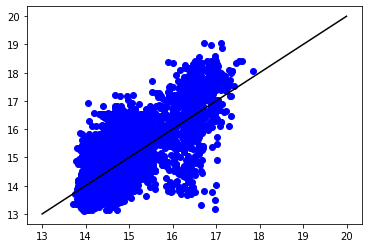

In [1200]:
plt.plot(y_pred2,y_test, 'ob')
#plt.plot(y_pred1,ydata,'or')
plt.plot(np.linspace(13,20,5),np.linspace(13,20,5) , '-k')
#plt.show()

#plt.plot(np.linspace(0,len(ydata), len(ydata)),list(ydata-y_pred1),'or')
#plt.plot(np.linspace(0,len(y_test), len(y_test)),list(y_test-y_pred2),'ob')



In [954]:
print(pipe.get_params())

{'memory': None, 'steps': [('categorical', ColumnTransformer(transformers=[('categorical',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['base_colour_value', 'eye_colour_value',
                                  'virginity_value', 'pattern_value',
                                  'generation_value', 'mouth_value',
                                  'secret_value', 'purrstige_value',
                                  'eyes_value', 'body_value',
                                  'colorprimary_value', 'coloreyes_value',
                                  'colortertiary_value', 'colorsecondary_value',
                                  'eye_shape_value', 'fur_value',
                                  'accent_colour_value']),
                                ('numeric', 'passthrough',
                                 ['accent_colour_count', 'cooldown_timer_count',
                                  'base_colour_count', 'pattern_count'

In [1078]:
param_grid = { 'regressor__alpha': np.linspace(0.001, .02, 100)}
#param_grid= {'regressor__n_neighbors': np.linspace(1,100,10)}
gs_est = RandomizedSearchCV(pipe, param_grid, verbose=1, cv=3, n_jobs=2)
gs_est.fit(X_train, y_train)
print(gs_est.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'regressor__alpha': 0.0025353535353535355}
